In [1]:
##  explore the QCEW data

##  Eryk Wdowiak
##  29 July 2019

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
qcew = pd.read_csv('qcew2019.csv')
qcew = qcew[qcew.columns[1:]]
#qcew.head()

In [4]:
##  let's rename the columns, so that we can interpret them
qcew = qcew.rename(columns = {'pct_sp1011': 'pct_naturalres',
                              'pct_sp1012': 'pct_construct',
                              'pct_sp1013': 'pct_manufact',
                              'pct_sp1021': 'pct_trade_trans',
                              'pct_sp1022': 'pct_information',
                              'pct_sp1023': 'pct_financial',
                              'pct_sp1024': 'pct_business_srvcs',
                              'pct_sp1025': 'pct_edu_health',
                              'pct_sp1026': 'pct_leisure_hosp',
                              'pct_sp1027': 'pct_other_srvcs',
                              'pct_sp1028': 'pct_public_admin',
                              'pct_sp1029': 'pct_unclassified'})


##  and let's aggregate goods producing employment
qcew['pct_goods'] = qcew['pct_naturalres'] + qcew['pct_construct'] + qcew['pct_manufact']

##  remove bad observations (small counties)
qcew = qcew[qcew['nn_pay'] >= 100]
qcew = qcew[qcew['cv_pay'] >= 0.10]
#qcew = qcew[qcew['mn_pay'] != 0]

##  and take logs
qcew['ln_mnpay'] = np.log(qcew['mn_pay'])
qcew['ln_cvpay'] = np.log(qcew['cv_pay'])

#qcew.head()

In [5]:
qcew.sort_values('cv_pay').head(100)

,fips_code,state_code,mn_pay,sd_pay,cv_pay,nn_pay,pct_naturalres,pct_construct,pct_manufact,pct_trade_trans,...,pct_financial,pct_business_srvcs,pct_edu_health,pct_leisure_hosp,pct_other_srvcs,pct_public_admin,pct_unclassified,pct_goods,ln_mnpay,ln_cvpay
2027,8047,8,45480.470067,4629.456821,0.101790,4059.0,0.000000,0.011981,0.000000,0.020191,...,0.000000,0.027735,0.007544,0.848458,0.010650,0.073441,0.000000,0.011981,10.725038,-2.284843
1491,5013,5,61381.440565,7012.663052,0.114247,1203.0,0.012394,0.044618,0.822238,0.070822,...,0.000000,0.003541,0.020892,0.004603,0.000000,0.020892,0.000000,0.879249,11.024863,-2.169390
2564,56027,56,40234.280488,5078.086917,0.126213,164.0,0.061224,0.000000,0.000000,0.202624,...,0.040816,0.030612,0.406706,0.107872,0.000000,0.150146,0.000000,0.061224,10.602475,-2.069785
1573,48205,48,43701.403509,5600.226714,0.128148,798.0,0.433553,0.000000,0.000000,0.153157,...,0.000000,0.022620,0.306786,0.044769,0.037229,0.001885,0.000000,0.433553,10.685135,-2.054573
181,20065,20,50871.509091,6624.228412,0.130215,110.0,0.190217,0.000000,0.000000,0.347826,...,0.000000,0.000000,0.161232,0.047101,0.025362,0.228261,0.000000,0.190217,10.837058,-2.038569
2479,29087,29,43409.802139,5990.794747,0.138006,187.0,0.058626,0.022613,0.147404,0.255444,...,0.045226,0.050251,0.266332,0.066164,0.000000,0.087940,0.000000,0.228643,10.678441,-1.980461
2824,22023,22,101493.709851,14114.304406,0.139066,4639.0,0.007405,0.788177,0.050983,0.056567,...,0.000000,0.050983,0.008497,0.005584,0.003035,0.028769,0.000000,0.846565,11.527752,-1.972808
2096,48359,48,40722.258993,6163.790898,0.151362,278.0,0.218644,0.000000,0.000000,0.174576,...,0.013559,0.044068,0.418644,0.054237,0.000000,0.071186,0.005085,0.218644,10.614530,-1.888083
3197,2013,2,59435.395414,9033.211704,0.151984,2137.0,0.000000,0.000000,0.828400,0.035607,...,0.000000,0.008151,0.031746,0.013728,0.000000,0.077649,0.000000,0.828400,10.992645,-1.883982
717,48271,48,118638.862903,18392.717334,0.155031,124.0,0.051724,0.000000,0.000000,0.497126,...,0.000000,0.000000,0.024425,0.040230,0.079023,0.304598,0.002874,0.051724,11.683839,-1.864129


In [6]:
##  and let's aggregate goods producing employment
##  (other sectors are service sectors)
qcew['pct_goods'] = qcew['pct_naturalres'] + qcew['pct_construct'] + qcew['pct_manufact']

##  let's create a variable to measure dispersion across industries
##  if all in one sector, then zero (not disperse):  1 - 1^2 = 0
qcew['dispersion'] = 1 - (((qcew['pct_naturalres'])**2) + 
                          ((qcew['pct_construct'])**2) + 
                          ((qcew['pct_manufact'])**2) + 
                          ((qcew['pct_trade_trans'])**2) + 
                          ((qcew['pct_information'])**2) + 
                          ((qcew['pct_financial'])**2) + 
                          ((qcew['pct_business_srvcs'])**2) + 
                          ((qcew['pct_edu_health'])**2) + 
                          ((qcew['pct_leisure_hosp'])**2) + 
                          ((qcew['pct_other_srvcs'])**2) + 
                          ((qcew['pct_public_admin'])**2) + 
                          ((qcew['pct_unclassified'])**2))

##  given the nature of this dataset ... remove low dispersion
qcew = qcew[qcew['dispersion'] >= 0.50]

In [7]:
##   Eunjoo's helper function to make dummies
def dummies(x, prefix):
    """
    Helper function to make dummies
    Input: series or array, prefix string
    Output: dummy dataframe
    """
    dummy = pd.get_dummies(x, prefix = prefix) ## drop_first = True)
    return dummy

In [8]:
##  turn states into dummy variables
st_df = dummies(qcew['state_code'],'st')

st_df = st_df.rename(columns = {
    'st_1':'Alabama','st_2':'Alaska','st_4':'Arizona','st_5':'Arkansas',
    'st_6':'California','st_8':'Colorado','st_9':'Connecticut',
    'st_10':'Delaware','st_11':'DistColumbia',
    'st_12':'Florida','st_13':'Georgia','st_15':'Hawaii','st_16':'Idaho',
    'st_17':'Illinois','st_18':'Indiana','st_19':'Iowa','st_20':'Kansas',
    'st_21':'Kentucky','st_22':'Louisiana','st_23':'Maine','st_24':'Maryland',
    'st_25':'Massachusetts','st_26':'Michigan','st_27':'Minnesota','st_28':'Mississippi',
    'st_29':'Missouri','st_30':'Montana','st_31':'Nebraska','st_32':'Nevada',
    'st_33':'NewHampshire','st_34':'NewJersey','st_35':'NewMexico','st_36':'NewYork',
    'st_37':'NorthCarolina','st_38':'NorthDakota','st_39':'Ohio','st_40':'Oklahoma',
    'st_41':'Oregon','st_42':'Pennsylvania','st_44':'RhodeIsland','st_45':'SouthCarolina',
    'st_46':'SouthDakota','st_47':'Tennessee','st_48':'Texas','st_49':'Utah',
    'st_50':'Vermont','st_51':'Virginia','st_53':'Washington','st_54':'WestVirginia',
    'st_55':'Wisconsin','st_56':'Wyoming','st_60':'AmericanSamoa','st_66':'Guam',
    'st_69':'NorthMarianaIsl','st_72':'PuertoRico','st_78':'VirginIslands'})

##  add them to data frame
qcew = qcew.join(st_df)

##  get a list of dummies
st_dummies = list(st_df.columns)

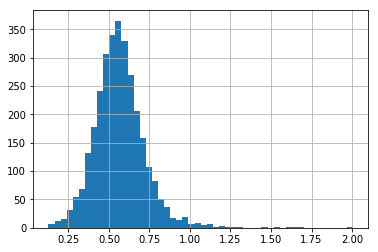

In [9]:
qcew['cv_pay'].hist(bins=50);

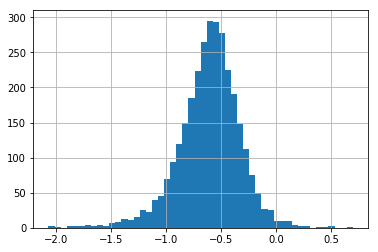

In [10]:
qcew['ln_cvpay'].hist(bins=50);

In [11]:
cols_int = ['ln_cvpay','ln_mnpay',
            'dispersion',
            'pct_goods',
            'pct_naturalres', 'pct_construct', 'pct_manufact',
            'pct_trade_trans','pct_information', 'pct_financial', 
            'pct_business_srvcs','pct_edu_health', 'pct_leisure_hosp', 
            'pct_other_srvcs','pct_public_admin', 'pct_unclassified']
qcew[cols_int].corr()[0:2].transpose()

,ln_cvpay,ln_mnpay
ln_cvpay,1.000000,0.139463
ln_mnpay,0.139463,1.000000
dispersion,0.249410,0.103548
pct_goods,-0.167266,-0.201473
pct_naturalres,-0.267198,-0.035261
pct_construct,0.004824,0.118977
pct_manufact,-0.018027,-0.234140
pct_trade_trans,-0.049362,-0.132957
pct_information,0.157796,0.378038
pct_financial,0.083539,0.256548


In [12]:
##  list of exogenous variables for regression model
exog = ['dispersion']
exog = exog + ['ln_mnpay']
exog = exog + ['pct_naturalres']
exog = exog + ['pct_construct']
exog = exog + ['pct_manufact']
exog = exog + ['pct_trade_trans']
exog = exog + ['pct_information']
exog = exog + ['pct_financial']
exog = exog + ['pct_business_srvcs']
exog = exog + ['pct_edu_health']
exog = exog + ['pct_leisure_hosp']
#exog = exog + ['pct_other_srvcs']
exog = exog + ['pct_public_admin']
#exog = exog + ['pct_unclassified']

In [13]:
##  run weighted least squares regression
m01_fmla = 'ln_cvpay~'
m01_fmla = m01_fmla + '+'.join(exog)

m01_wls = smf.wls(m01_fmla,data=qcew, weights=qcew['nn_pay']).fit() 
m01_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cvpay   R-squared:                       0.271
Model:                            WLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     95.00
Date:                Thu, 30 Jul 2020   Prob (F-statistic):          3.32e-200
Time:                        08:55:54   Log-Likelihood:                -1574.0
No. Observations:                3082   AIC:                             3174.
Df Residuals:                    3069   BIC:                             3252.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -4.7248      0.283    -16.686      0.000      -5.280      -4.170
dispersion             1.0987      0.090     12.190      0.000       0.922       1.275
ln_mnpay               0.2083      0.013     16.368      0.000       0.183       0.233
pct_naturalres         0.4812      0.226      2.125      0.034       0.037       0.925
pct_construct          0.7578      0.268      2.823      0.005       0.232       1.284
pct_manufact           0.7634      0.226      3.378      0.001       0.320       1.207
pct_trade_trans        1.1889      0.229      5.184      0.000       0.739       1.639
pct_information        0.4688      0.285      1.647      0.100      -0.089       1.027
pct_financial          0.4831      0.252      1.919      0.055      -0.011       0.977
pct_business_srvcs     0.8967      0.225      3.984      0.000       0.455       1.338
pct_edu_health         1.6333      0.229      7.143      0.000       1.185       2.082
pct_leisure_hosp       1.4171      0.232      6.102      0.000       0.962       1.872
pct_public_admin       0.5096      0.252      2.019      0.044       0.015       1.005
==============================================================================
Omnibus:                     1816.094   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131743.989
Skew:                           1.983   Prob(JB):                         0.00
Kurtosis:                      34.783   Cond. No.                     3.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
##  run weighted least squares regression with state effects
holdout = ['California'] 
state_dum_list = [val for val in st_dummies if val not in holdout]
exog_state = exog + state_dum_list

m02_fmla = 'ln_cvpay~'
m02_fmla = m02_fmla + '+'.join(exog_state)

m02_wls = smf.wls(m02_fmla,data=qcew, weights=qcew['nn_pay']).fit() 
m02_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:               ln_cvpay   R-squared:                       0.364
Model:                            WLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     26.99
Date:                Thu, 30 Jul 2020   Prob (F-statistic):          4.17e-246
Time:                        08:55:55   Log-Likelihood:                -1363.2
No. Observations:                3082   AIC:                             2856.
Df Residuals:                    3017   BIC:                             3249.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.7088      0.339    -10.934      0.000      -4.374      -3.044
dispersion             0.9088      0.093      9.741      0.000       0.726       1.092
ln_mnpay               0.2463      0.015     16.008      0.000       0.216       0.276
pct_naturalres        -0.7334      0.278     -2.638      0.008      -1.278      -0.188
pct_construct         -0.5283      0.329     -1.606      0.108      -1.173       0.117
pct_manufact          -0.4852      0.273     -1.779      0.075      -1.020       0.050
pct_trade_trans       -0.2237      0.281     -0.797      0.426      -0.774       0.327
pct_information       -1.0455      0.342     -3.059      0.002      -1.716      -0.375
pct_financial         -1.0207      0.302     -3.379      0.001      -1.613      -0.429
pct_business_srvcs    -0.4084      0.273     -1.494      0.135      -0.944       0.128
pct_edu_health         0.3480      0.279      1.248      0.212      -0.199       0.895
pct_leisure_hosp       0.1508      0.284      0.531      0.595      -0.406       0.707
pct_public_admin      -0.5577      0.287     -1.942      0.052      -1.121       0.005
Alabama                0.0143      0.023      0.621      0.535      -0.031       0.060
Alaska                -0.0349      0.056     -0.623      0.533      -0.145       0.075
Arizona               -0.0109      0.017     -0.641      0.521      -0.044       0.022
Arkansas               0.0613      0.031      2.002      0.045       0.001       0.121
Colorado               0.0217      0.018      1.195      0.232      -0.014       0.057
Connecticut            0.0334      0.022      1.525      0.127      -0.010       0.076
Delaware               0.0231      0.044      0.525      0.600      -0.063       0.109
DistColumbia          -0.3979      0.038    -10.482      0.000      -0.472      -0.324
Florida                0.0440      0.013      3.437      0.001       0.019       0.069
Georgia               -0.0494      0.016     -3.065      0.002      -0.081      -0.018
Hawaii                -0.1930      0.033     -5.813      0.000      -0.258      -0.128
Idaho                  0.0565      0.036      1.556      0.120      -0.015       0.128
Illinois               0.0438      0.014      3.245      0.001       0.017       0.070
Indiana                0.0302      0.020      1.538      0.124      -0.008       0.069
Iowa                  -0.0450      0.028     -1.599      0.110      -0.100       0.010
Kansas                -0.0782      0.027     -2.853      0.004      -0.132      -0.024
Kentucky               0.0251      0.026      0.972      0.331      -0.026       0.076
Louisiana              0.0727      0.023      3.200      0.001       0.028       0.117
Maine                 -0.0580      0.038     -1.515      0.130      -0.133       0.017
Maryland              -0.0784      0.0